C:\Users\nozan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


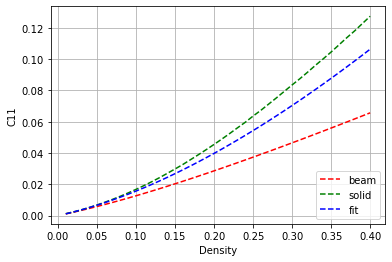

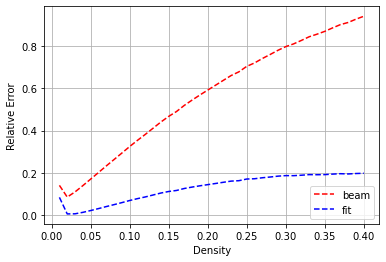

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv



raw_beam = pd.read_csv("Data_be.csv")
raw_solid = pd.read_csv("Data_vv.csv")
raw_fit = pd.read_csv("Data_fit.csv")


frequency = raw_solid['name'].value_counts(sort=True)

dataframe = frequency.to_frame().reset_index()

dataframe.rename(columns = {'index':'unitcell', 
                       'name':'number'}, 
            inplace = True)


name = "tet_Z04.7_E1118"
component = "C11"

unitcell_beam = raw_beam.loc[raw_beam['name'] == name]
unitcell_solid = raw_solid.loc[raw_solid['name'] == name]
unitcell_fit = raw_fit.loc[raw_fit["name"] == name]

unitcell_solid = unitcell_solid.sort_values(by=['density'])
unitcell_beam = unitcell_beam.sort_values(by=['density'])
unitcell_fit = unitcell_fit.sort_values(by=['density'])



plt.figure(1)
plt.plot(unitcell_beam["density"], unitcell_beam[component], "r--",  label="beam")
plt.plot(unitcell_solid["density"], unitcell_solid[component], "g--",  label="solid")
plt.plot(unitcell_fit["density"], unitcell_fit[component], "b--",  label="fit")
plt.ylabel(component)
plt.xlabel("Density")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


unit_solid = unitcell_solid[component].to_numpy()
unit_beam = unitcell_beam[component].to_numpy()
unit_fit = unitcell_fit[component].to_numpy()

error_beam = np.subtract(unit_solid, unit_beam)
error_fit = np.subtract(unit_solid, unit_fit)
relative_error_beam = np.divide(error_beam, unit_beam)
relative_error_fit = np.divide(error_fit, unit_fit)


plt.figure(2)
plt.plot(unitcell_solid["density"], relative_error_beam, "r--", label="beam")
plt.plot(unitcell_solid["density"], relative_error_fit, "b--", label = "fit")
plt.ylabel('Relative Error')
plt.xlabel("Density")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

grid = pv.read('mesh_1117.vtk')
cpos = [(0.1, 0, 0), (0, 0, 0), (0, 0.1, 0)]
grid.plot(show_scalar_bar=False, show_axes=False,zoom = 0.5, off_screen=True)